## The World Happiness Report Data Analysis:

### A. Importing, cleaning and numerical summaries

* Download the data set data.csv from the Kaggle.
* Import the data as a pandas DataFrame.
* Check the number of observations.
* Obtain the column headings.
* Check the data type for each column.
* Check if there are any missing values.
* If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
* Obtain the mean, minimum and maximum value for each column containing numerical data.
* List the 10 happiest countries.
* List the 10 least happy countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
whr = pd.read_csv("2016.csv")

In [3]:
whr.head(12)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [4]:
whr.shape

(157, 13)

In [5]:
print("There are {:,} rows ".format(whr.shape[0]) + "and {} columns in our data".format(whr.shape[1]))

There are 157 rows and 13 columns in our data


In [6]:
whr.set_index('Country', inplace=True)

whr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 12 columns):
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
whr.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
NULLS = whr[whr.isnull().any(axis=1)]

In [9]:
whr.dropna(inplace=True)

whr.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
whr.duplicated().sum()

0

In [11]:
whr.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [12]:
whr.sort_values(by="Happiness Rank", ascending=True).head(10)

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650


In [13]:
whr.sort_values(by="Happiness Rank", ascending=False).head(10)

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769


### B. Indexing and grouping

* Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions: North America, Latin America, Western Europe, Eastern Europe, Asia Pacific, Africa.
* Compute the mean happiness score for each region and rank the regions from most happy to least happy.
* Compute the number of countries in each region that have a happiness score above 6.0.
* Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [14]:
whr_Region = whr.groupby('Region')

In [15]:
whr_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,38.0,4.136421,0.558494,2.905,3.74500,4.1300,4.43325,5.648
Southern Asia,7.0,4.563286,0.616190,3.360,4.40950,4.6430,4.96250,5.196
Southeastern Asia,9.0,5.338889,0.930686,3.907,4.87600,5.2790,6.00500,6.739
Central and Eastern Europe,29.0,5.370690,0.590395,4.217,5.14500,5.4880,5.81300,6.596
Middle East and Northern Africa,19.0,5.386053,1.057559,3.069,4.78350,5.3030,6.29700,7.267
Eastern Asia,6.0,5.624167,0.526885,4.907,5.29825,5.6465,5.89950,6.379
Latin America and Caribbean,24.0,6.101750,0.725680,4.028,5.80225,6.1260,6.66275,7.087
Western Europe,21.0,6.685667,0.789190,5.033,6.36100,6.9070,7.33900,7.526
North America,2.0,7.254000,0.212132,7.104,7.17900,7.2540,7.32900,7.404


In [16]:
whr[whr["Region"]=="Western Europe"].head()

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [17]:
whr = whr.replace('Europe', 'Eastern Europe')

In [18]:
whr_Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.323500,0.014849,7.313,7.31825,7.3235,7.32875,7.334
North America,2.0,7.254000,0.212132,7.104,7.17900,7.2540,7.32900,7.404
Western Europe,21.0,6.685667,0.789190,5.033,6.36100,6.9070,7.33900,7.526
Latin America and Caribbean,24.0,6.101750,0.725680,4.028,5.80225,6.1260,6.66275,7.087
Eastern Asia,6.0,5.624167,0.526885,4.907,5.29825,5.6465,5.89950,6.379
Middle East and Northern Africa,19.0,5.386053,1.057559,3.069,4.78350,5.3030,6.29700,7.267
Central and Eastern Europe,29.0,5.370690,0.590395,4.217,5.14500,5.4880,5.81300,6.596
Southeastern Asia,9.0,5.338889,0.930686,3.907,4.87600,5.2790,6.00500,6.739
Southern Asia,7.0,4.563286,0.616190,3.360,4.40950,4.6430,4.96250,5.196


In [19]:
whr_SSA = whr[whr['Region'] == 'Sub-Saharan Africa']
whr_WE = whr[whr['Region'] == 'Western Europe']
whr_CEE = whr[whr['Region'] == 'Central and Eastern Europe']
whr_NA = whr[whr['Region'] == 'North America']
whr_ANZ = whr[whr['Region'] == 'Australia and New Zealand']
whr_LAC = whr[whr['Region'] == 'Latin America and Caribbean']
whr_EA = whr[whr['Region'] == 'Eastern Asia']
whr_MENA = whr[whr['Region'] == 'Middle East and Northern Africa']
whr_SEA = whr[whr['Region'] == 'Southeastern Asia']
whr_SA = whr[whr['Region'] == 'Southern Asia']

In [20]:
len(whr_SSA[whr_SSA['Happiness Score'] > 6])

0

In [21]:
print("There are {} countries in Sub-Saharan Africa that have a happiness score above 6.0 ".format(len(whr_SSA[whr_SSA['Happiness Score'] > 6])))

There are 0 countries in Sub-Saharan Africa that have a happiness score above 6.0 


In [22]:
Delta_SSA = whr_SSA.max(axis=0)['Happiness Score'] - whr_SSA.min(axis=0)['Happiness Score']
print(Delta_SSA)

2.743


In [23]:
len(whr_WE[whr_WE['Happiness Score'] > 6])

16

In [24]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(whr_WE[whr_WE['Happiness Score'] > 6])))

There are 16 countries in Western Europe that have a happiness score above 6.0 


In [25]:
Delta_WE = whr_WE.max(axis=0)['Happiness Score'] - whr_WE.min(axis=0)['Happiness Score']
print(Delta_WE)

2.4929999999999994


In [26]:
len(whr_CEE[whr_CEE['Happiness Score'] > 6])

2

In [27]:
print("There is {} country in Central and Eastern Europe that has a happiness score above 6.0 ".format(len(whr_CEE[whr_CEE['Happiness Score'] > 6])))

There is 2 country in Central and Eastern Europe that has a happiness score above 6.0 


In [28]:
Delta_CEE = whr_CEE.max(axis=0)['Happiness Score'] - whr_CEE.min(axis=0)['Happiness Score']
print(Delta_CEE)

2.3790000000000004


In [29]:
len(whr_NA[whr_NA['Happiness Score'] > 6])

2

In [30]:
print("There are {} countries in the North America that have a happiness score above 6.0 ".format(len(whr_NA[whr_NA['Happiness Score'] > 6])))

There are 2 countries in the North America that have a happiness score above 6.0 


In [31]:
Delta_NA = whr_NA.max(axis=0)['Happiness Score'] - whr_NA.min(axis=0)['Happiness Score']
print(Delta_NA)

0.2999999999999998


In [32]:
len(whr_ANZ[whr_ANZ['Happiness Score'] > 6])

2

In [33]:
print("There are {} countries in the Australia and New Zealand that have a happiness score above 6.0 ".format(len(whr_ANZ[whr_ANZ['Happiness Score'] > 6])))

There are 2 countries in the Australia and New Zealand that have a happiness score above 6.0 


In [34]:
Delta_ANZ = whr_ANZ.max(axis=0)['Happiness Score'] - whr_ANZ.min(axis=0)['Happiness Score']
print(Delta_ANZ)

0.020999999999999908


In [35]:
len(whr_LAC[whr_LAC['Happiness Score'] > 6])

14

In [36]:
print("There are {} countries in the Latin America and Caribbean that have a happiness score above 6.0 ".format(len(whr_LAC[whr_LAC['Happiness Score'] > 6])))

There are 14 countries in the Latin America and Caribbean that have a happiness score above 6.0 


In [37]:
Delta_LAC = whr_LAC.max(axis=0)['Happiness Score'] - whr_LAC.min(axis=0)['Happiness Score']
print(Delta_LAC)

3.059


In [38]:
len(whr_EA[whr_EA['Happiness Score'] > 6])

1

In [39]:
print("There are {} countries in the Eastern Asia that have a happiness score above 6.0 ".format(len(whr_EA[whr_EA['Happiness Score'] > 6])))

There are 1 countries in the Eastern Asia that have a happiness score above 6.0 


In [40]:
Delta_EA = whr_EA.max(axis=0)['Happiness Score'] - whr_EA.min(axis=0)['Happiness Score']
print(Delta_EA)

1.4719999999999995


In [41]:
len(whr_MENA[whr_MENA['Happiness Score'] > 6])

7

In [42]:
print("There are {} countries in the Middle East and Northern Africa that have a happiness score above 6.0 ".format(len(whr_MENA[whr_MENA['Happiness Score'] > 6])))

There are 7 countries in the Middle East and Northern Africa that have a happiness score above 6.0 


In [43]:
Delta_MENA = whr_MENA.max(axis=0)['Happiness Score'] - whr_MENA.min(axis=0)['Happiness Score']
print(Delta_MENA)

4.198


In [44]:
len(whr_SEA[whr_SEA['Happiness Score'] > 6])

3

In [45]:
print("There are {} countries in the Southeastern Asia that have a happiness score above 6.0 ".format(len(whr_SEA[whr_SEA['Happiness Score'] > 6])))

There are 3 countries in the Southeastern Asia that have a happiness score above 6.0 


In [46]:
Delta_SEA = whr_SEA.max(axis=0)['Happiness Score'] - whr_SEA.min(axis=0)['Happiness Score']
print(Delta_SEA)

2.832


In [47]:
len(whr_SA[whr_SA['Happiness Score'] > 6])

0

In [48]:
print("There are {} countries in the Southern Asia that have a happiness score above 6.0 ".format(len(whr_SA[whr_SA['Happiness Score'] > 6])))

There are 0 countries in the Southern Asia that have a happiness score above 6.0 


In [49]:
Delta_SA = whr_SA.max(axis=0)['Happiness Score'] - whr_SA.min(axis=0)['Happiness Score']
print(Delta_SA)

1.8360000000000007


In [50]:
Deltas = {}

In [51]:
Deltas["Sub-Saharan Africa"] = Delta_SSA
Deltas["Southern Asia"] = Delta_SA
Deltas["Western Europe"] = Delta_WE
Deltas["Middle East and Northern Africa"] = Delta_MENA
Deltas["North America"] = Delta_NA
Deltas["Central and Eastern Europe"] = Delta_CEE
Deltas["Australia and New Zealand"] = Delta_ANZ
Deltas["Latin America and Caribbean"] = Delta_LAC
Deltas["Eastern Asia"] = Delta_EA
Deltas["Southeastern Asia"] = Delta_SEA

In [52]:
print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))

The Middle East and Northern Africa region seems to have the largest range of happiness scores


### C. Bar plot of the Happiness Score

* Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.
* You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
* Economy
* Family
* Health
* Freedom
* Generosity
* Corruption
* Dystopia
* Choose a distinct color for each category and include an appropriate legend with your chart.
* Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

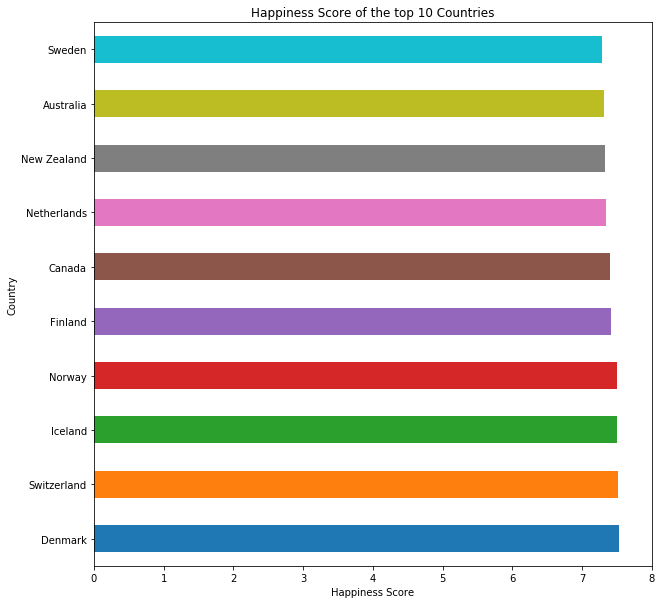

In [53]:
whr['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

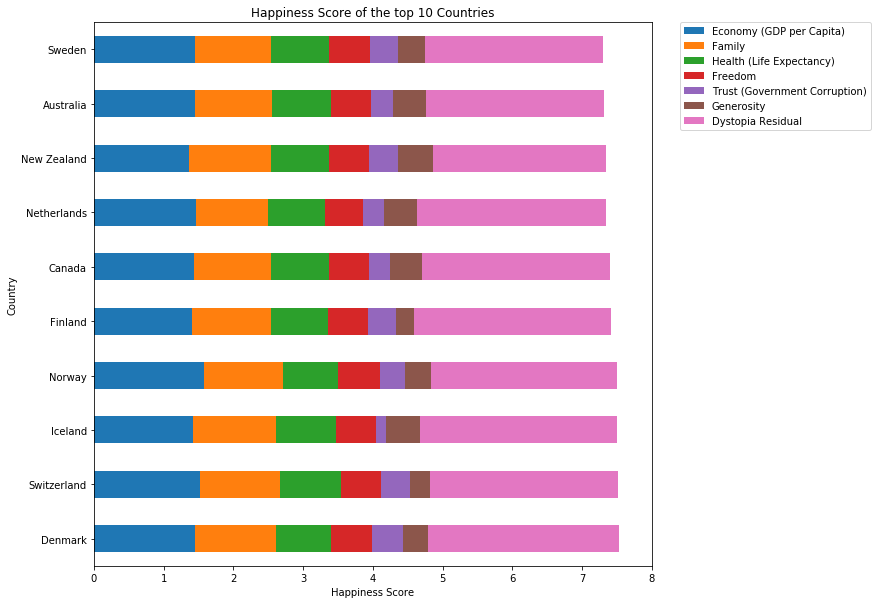

In [54]:
whr[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

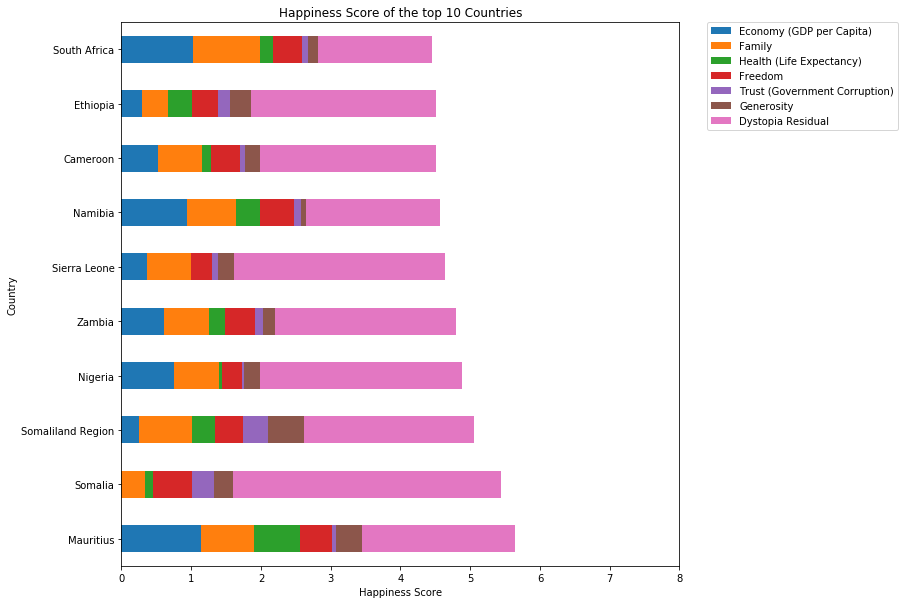

In [55]:
whr_SSA[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### D. Pairwise Scatter plots

* Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as supposed to separate commands for each plot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


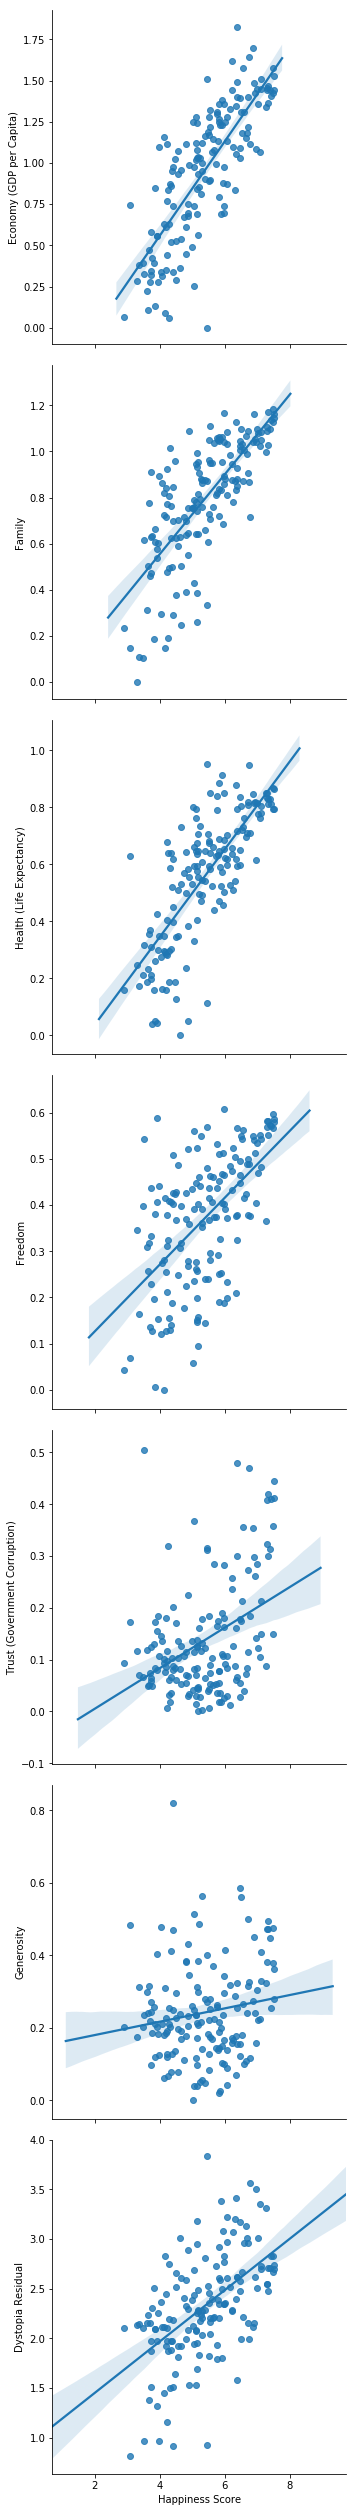

In [56]:
sns.pairplot(data=whr, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

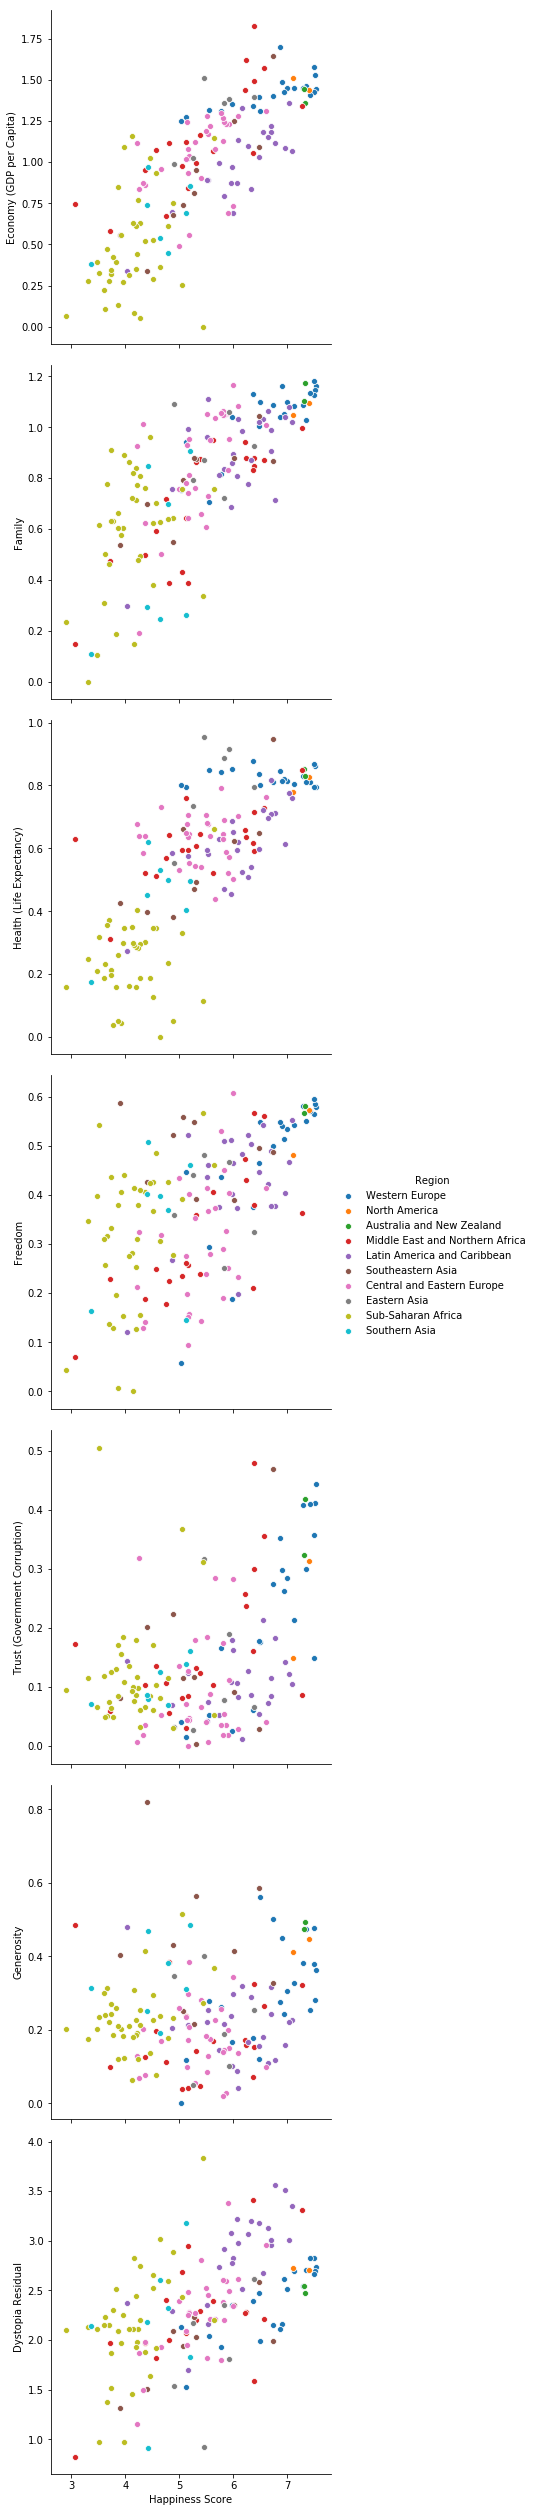

In [57]:
sns.pairplot(data = whr, height = 5, hue = 'Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

### E. Correlation

* Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [58]:
whr.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Lower Confidence Interval        0.999485
Upper Confidence Interval        0.999474
Economy (GDP per Capita)         0.790322
Health (Life Expectancy)         0.765384
Family                           0.739252
Freedom                          0.566827
Dystopia Residual                0.543738
Trust (Government Corruption)    0.402032
Generosity                       0.156848
Happiness Rank                  -0.995743
Name: Happiness Score, dtype: float64

In [59]:
whr.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score                  1.000000
Lower Confidence Interval        0.999485
Upper Confidence Interval        0.999474
Happiness Rank                   0.995743
Economy (GDP per Capita)         0.790322
Health (Life Expectancy)         0.765384
Family                           0.739252
Freedom                          0.566827
Dystopia Residual                0.543738
Trust (Government Corruption)    0.402032
Generosity                       0.156848
Name: Happiness Score, dtype: float64

In [60]:
whr.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


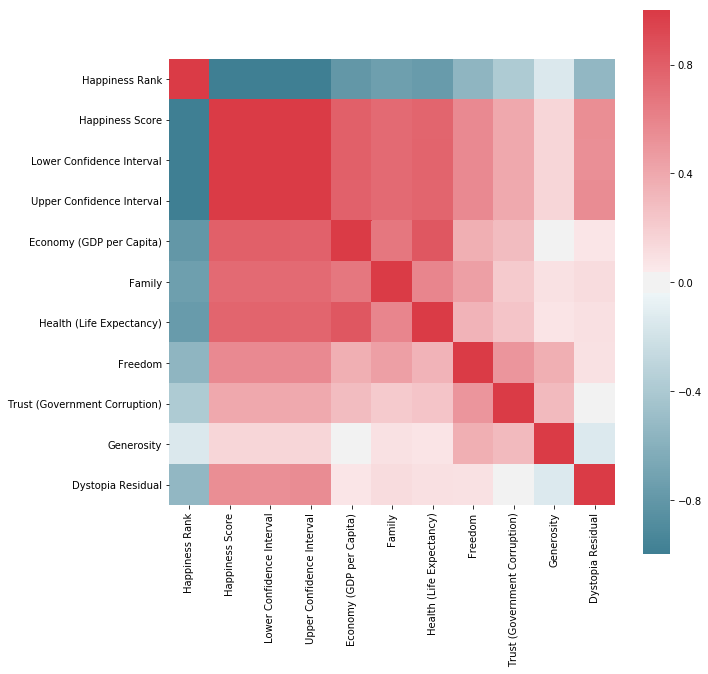

In [61]:
corr = whr.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

### F. Probabilities

* Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

In [62]:
whr[whr['Happiness Score'] > 6].shape[0]

47

In [63]:
whr[(whr['Happiness Score'] > 6) & (whr['Region'] == 'Western Europe')].shape[0]

16

In [64]:
float(len(whr[(whr['Happiness Score'] > 6) & (whr['Region'] == 'Western Europe')]))/float(len(whr[whr['Happiness Score'] > 6]))

0.3404255319148936

In [65]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(whr[(whr['Happiness Score'] > 6) & (whr['Region'] == 'Western Europe')].shape[0]

)/float(whr[whr['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 34%


### G. Matrices

* Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [66]:
whr.shape

(157, 12)

In [69]:
Sub_Saharan_Africa = []
Southern_Asia = []
Western_Europe = []
Middle_East_and_Northern_Africa = []
North_America = []
Central_and_Eastern_Europe = []
Australia_and_New_Zealand = []
Latin_America_and_Caribbean = []
Eastern_Asia = []
Southeastern_Asia = []

In [71]:
for x in whr['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: 
        Western_Europe.append(0)

In [72]:
for x in whr['Region']:
    if x == 'Southern_Asia':
         Southern_Asia.append(1)
    else: 
        Southern_Asia.append(0)

In [95]:
for x in whr['Region']:
    if x == 'Sub_Saharan_Africa':
         Sub_Saharan_Africa.append(1)
    else: 
        Sub_Saharan_Africa.append(0)

In [75]:
for x in whr['Region']:
    if x == 'Middle_East_and_Northern_Africa':
         Middle_East_and_Northern_Africa.append(1)
    else: 
        Middle_East_and_Northern_Africa.append(0)

In [76]:
for x in whr['Region']:
    if x == 'North_America':
         North_America.append(1)
    else: 
        North_America.append(0)

In [77]:
for x in whr['Region']:
    if x == 'Central_and_Eastern_Europe':
         Central_and_Eastern_Europe.append(1)
    else: 
        Central_and_Eastern_Europe.append(0)

In [78]:
for x in whr['Region']:
    if x == 'Australia_and_New_Zealand':
         Australia_and_New_Zealand.append(1)
    else: 
        Australia_and_New_Zealand.append(0)

In [79]:
for x in whr['Region']:
    if x == 'Latin_America_and_Caribbean':
         Latin_America_and_Caribbean.append(1)
    else: 
        Latin_America_and_Caribbean.append(0)

In [80]:
for x in whr['Region']:
    if x == 'Eastern_Asia':
         Eastern_Asia.append(1)
    else: 
        Eastern_Asia.append(0)

In [81]:
for x in whr['Region']:
    if x == 'Southeastern_Asia':
         Southeastern_Asia.append(1)
    else: 
        Southeastern_Asia.append(0)

In [94]:
Matrix = pd.DataFrame(index=whr.index)